# BEGIN LAB 1/LAB 2/LAB 3 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
def main():

    X, y = load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.5, random_state=0)
    gnb = GaussianNB()

    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

In [4]:
# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    main()

Number of mislabeled points out of a total 75 points : 4


In [6]:
import numpy as np
from matplotlib import pyplot as plt

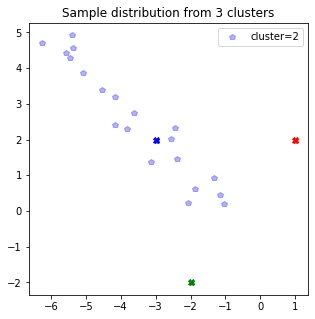

In [43]:
#Generate the dataset
N_CLUSTER = 3
N_FEATURES = 2
_N = 20
N_SAMPLE = _N * N_CLUSTER

S1 = np.identity(N_FEATURES)
S1[0,1] = S1[1,0] = 0
S2 = np.identity(N_FEATURES)*0.1
S3 = np.identity(N_FEATURES)*3
S3[0,1] = S3[1,0] = -2.8

mu1 = np.array([1, 2])
mu2 = np.array([-2,-2])
mu3 = np.array([-3, 2])

npMEANS = np.array([mu1,mu2,mu3])
npSIGMAS = np.array([S1,S2,S3])

colors = np.array(["red","green","blue"])
npX = []
plt.figure(figsize=(5,5))
for icluster in range(N_CLUSTER):
    color = colors[icluster]
    npmean = npMEANS[icluster]
    s_cluster = np.random.multivariate_normal(npmean,npSIGMAS[icluster],_N)
    npX.extend(s_cluster)
    plt.plot(npmean[0],npmean[1],"X",color=color)

plt.plot(s_cluster[:,0],s_cluster[:,1],"p",alpha=0.3,color=color,label="cluster={}".format(icluster))
plt.title("Sample distribution from {} clusters".format(N_CLUSTER))
plt.legend()
plt.show()

In [44]:
GT = [0 for _ in range(_N)] + [1 for _ in range(_N)] + [2 for _ in range(_N)]
npX = np.array(npX)
print("npX: Data Dimension = (N_SAMPLE,N_FEATURES) = {}".format(npX.shape))
print("npMEANS: Data Dimension = (N_CLUSTER,N_FEATURES) = {}".format(npMEANS.shape))
print("npSIGMAS: Data Dimension = (N_CLUSTER,N_FEATURES,N_FEATURES) = {}".format(npSIGMAS.shape))

for icluster in range(N_CLUSTER):
    print("\n***CLUSTER={}***".format(icluster))
    print(">>>MEAN")
    print(npMEANS[icluster])
    print(">>>SIGMA")
    print(npSIGMAS[icluster])

npX: Data Dimension = (N_SAMPLE,N_FEATURES) = (60, 2)
npMEANS: Data Dimension = (N_CLUSTER,N_FEATURES) = (3, 2)
npSIGMAS: Data Dimension = (N_CLUSTER,N_FEATURES,N_FEATURES) = (3, 2, 2)

***CLUSTER=0***
>>>MEAN
[1 2]
>>>SIGMA
[[1. 0.]
 [0. 1.]]

***CLUSTER=1***
>>>MEAN
[-2 -2]
>>>SIGMA
[[0.1 0. ]
 [0.  0.1]]

***CLUSTER=2***
>>>MEAN
[-3  2]
>>>SIGMA
[[ 3.  -2.8]
 [-2.8  3. ]]


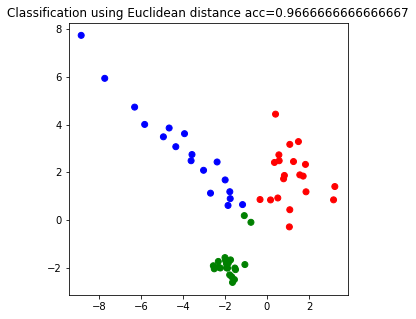

In [41]:
#Euclidean classifier
from scipy.spatial import distance
npEuclidean = [[0 for _ in range(npMEANS.shape[0])] 
               for _ in range(npX.shape[0])] 
for isample in range(npX.shape[0]): 
    for icluster in range(npMEANS.shape[0]): 
        npEuclidean[isample][icluster]= distance.euclidean(npX[isample],npMEANS[icluster])
npEuclidean= np.array(npEuclidean) 

pred = npEuclidean.argmin(axis=1) 
plt.figure(figsize=(5,5)) 
plt.scatter(npX[:,0],npX[:,1],c=colors[pred]) 
plt.title("Classification using Euclidean distance acc={}".format(np.mean(GT == pred))) 
plt.show()

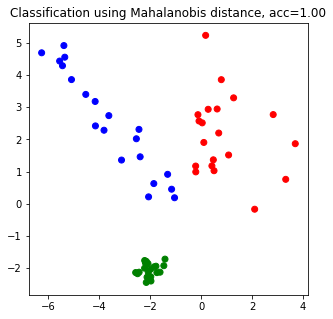

In [45]:
#mahalanobis distance 
npMAHALANOBIS = [[0 for _ in range(npMEANS.shape[0])] 
                 for _ in range(npX.shape[0])] 
for isample in range(npX.shape[0]): 
    for icluster in range(npMEANS.shape[0]): 
        npMAHALANOBIS[isample][icluster] = distance.mahalanobis(npX[isample], 
                                                                npMEANS[icluster], 
                                                                VI=scipy.linalg.pinv(npSIGMAS[icluster])) 
npMAHALANOBIS = np.array(npMAHALANOBIS)

pred = npMAHALANOBIS.argmin(axis=1) 
plt.figure(figsize=(5, 5)) 
plt.scatter(npX[:, 0], npX[:, 1], c=colors[pred]) 
plt.title("Classification using Mahalanobis distance, acc={:3.2f}".format(np.mean(GT == pred))) 
plt.show()

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

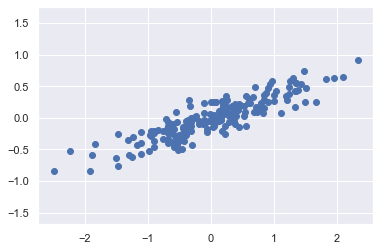

In [47]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [53]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [54]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


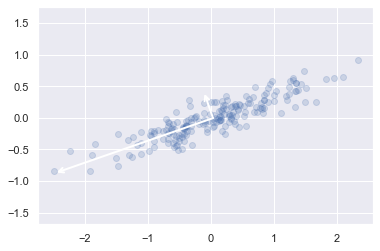

In [55]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [56]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


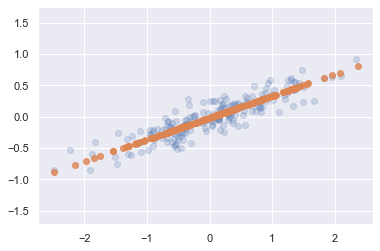

In [57]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [58]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [59]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


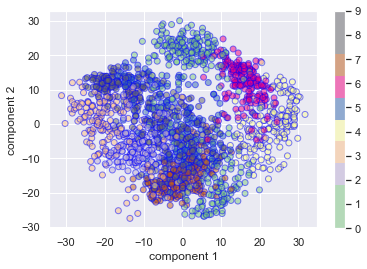

In [65]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target,
            edgecolor='blue', alpha=0.5, cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

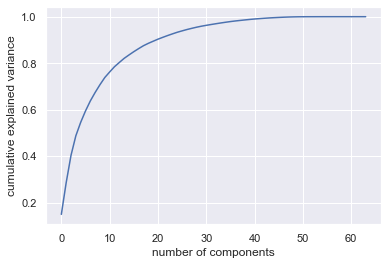

In [66]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

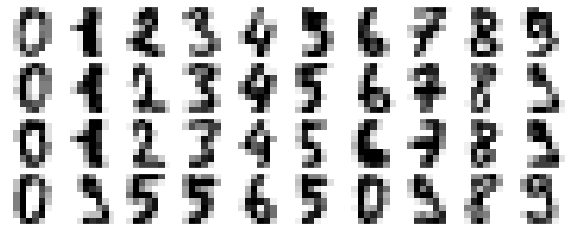

In [67]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

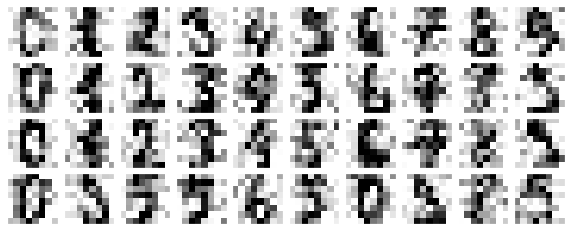

In [68]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [69]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

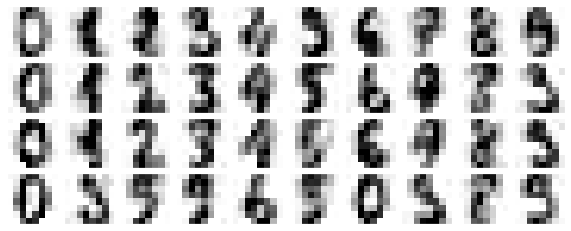

In [70]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets as datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [75]:
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [76]:
#find how many total observations are in dataset
len(df.index)

150

In [77]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [78]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.9800000000000001


In [79]:
#define new observation
new = [5, 3, 1, .4]

#predict which class the new observation belongs to
model.predict([new])


array(['setosa'], dtype='<U10')

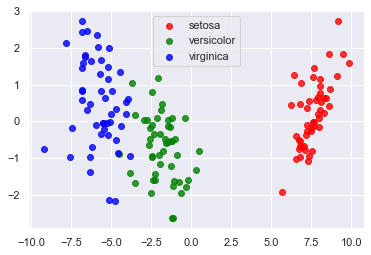

In [80]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

# END OF LAB 1/LAB 2/LAB 3